In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib ipympl
import seaborn as sns
import geopandas as gpd
import plotly.graph_objects as go


In [2]:
data = pd.read_csv("Unemployment_in_India.csv")

In [3]:
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [4]:
data.tail()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN
767,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data = data.dropna(axis=0)

In [6]:
data.tail()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban
753,West Bengal,30-06-2020,Monthly,9.86,9088931.0,37.57,Urban


In [7]:
data.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 46.2+ KB


In [9]:
id_max_unemp_rec = data[" Estimated Unemployment Rate (%)"].idxmax()

print(
    "Maximum unemployment rate is ", 
    data[" Estimated Unemployment Rate (%)"][id_max_unemp_rec], 
    " in ", 
    data["Region"][id_max_unemp_rec]
    )

Maximum unemployment rate is  76.74  in  Puducherry


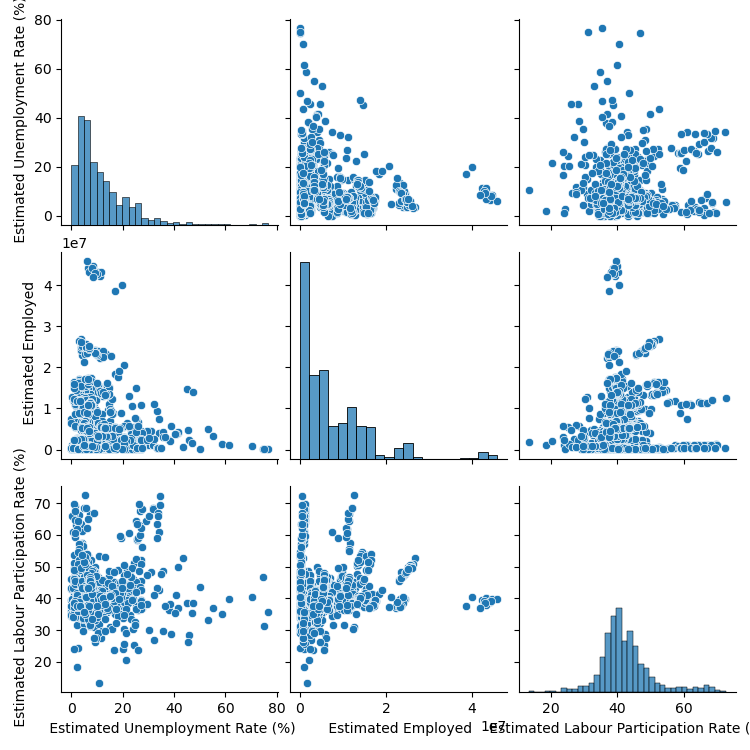

In [10]:
sns.pairplot(data)

In [11]:
# Sort the DataFrame by 'employment rate' in descending order
sorted_dataframe = data.sort_values(by=' Estimated Unemployment Rate (%)', ascending=False)

# Group the sorted DataFrame by 'region' and select the maximum ' Estimated Unemployment Rate (%)' value for each region
max_unemployment_rates = sorted_dataframe.groupby('Region')[' Estimated Unemployment Rate (%)'].max()

# Create the hierarchical structure
sunburst_data = {
    'labels': max_unemployment_rates.index,
    'parents': [''] * len(max_unemployment_rates),
    'values': max_unemployment_rates.values
}

sunb = go.Figure(go.Sunburst(
    labels=sunburst_data['labels'],
    parents=sunburst_data['parents'],
    values=sunburst_data['values']
))

sunb.update_layout(margin=dict(t=0, l=0, r=0, b=0))

sunb.show()

In [12]:
sf = "output.shp"

# reading shape file
map_sf = gpd.read_file(sf)


In [13]:
# checking the GEOdataframe

map_sf.head()

,objectid,statecode,statename,state_ut,distcode,distname,distarea,totalpopul,totalhh,totpopmale,totpopfema,st_areasha,st_lengths,geometry
0,1,05,Uttarakhand,STATE,066,Nainital,4251.0,954605.0,191383.0,493666.0,460939.0,5.322546e+09,506182.695952,"POLYGON ((79.52659 29.05543, 79.52550 29.05545..."
1,2,05,Uttarakhand,STATE,060,Dehradun,3088.0,1696694.0,347001.0,892199.0,804495.0,4.177236e+09,578188.681639,"POLYGON ((77.87557 30.26052, 77.87467 30.26087..."
2,3,05,Uttarakhand,STATE,064,Almora,3144.0,622506.0,140577.0,291081.0,331425.0,4.140751e+09,463454.225766,"POLYGON ((79.28494 29.92735, 79.28495 29.92723..."
3,4,05,Uttarakhand,STATE,065,Champawat,1766.0,259648.0,53953.0,131125.0,128523.0,2.294297e+09,314508.010612,"POLYGON ((80.12479 29.01308, 80.12481 29.01306..."
4,5,05,Uttarakhand,STATE,056,Uttarkashi,8016.0,330086.0,67602.0,168597.0,161489.0,1.085166e+10,786425.588972,"POLYGON ((78.92267 31.25333, 78.93106 31.26840..."


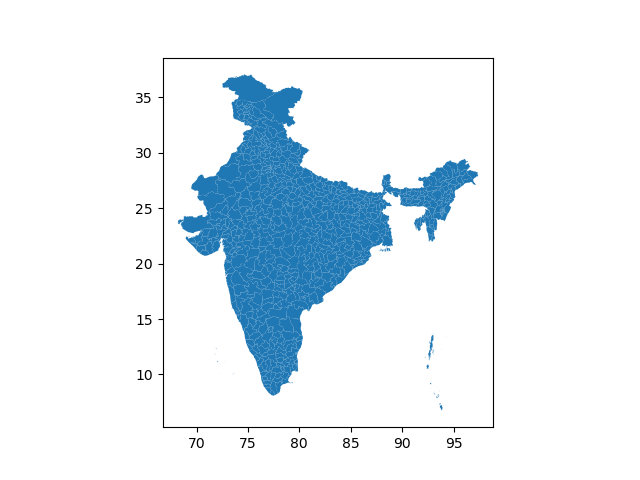

In [14]:
# plotting the map with shape file data

map_sf.plot()
plt.show()

In [15]:
# merging shapefile data with unemployment data

merged = map_sf.set_index("statename").join(data.set_index("Region"))

In [16]:
merged.head()

,objectid,statecode,state_ut,distcode,distname,distarea,totalpopul,totalhh,totpopmale,totpopfema,st_areasha,st_lengths,geometry,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
Andaman & Nicobar Islands,380,35,UNION TERRITORY,639,North & Middle Andaman,3736.0,105597.0,26199.0,54861.0,50736.0,3.582828e+09,1.665121e+06,"MULTIPOLYGON (((93.02911 13.57474, 93.02910 13...",NaN,NaN,NaN,NaN,NaN,NaN
Andaman & Nicobar Islands,381,35,UNION TERRITORY,640,South Andaman,2672.0,238142.0,59064.0,127283.0,110859.0,2.521309e+09,1.206604e+06,"MULTIPOLYGON (((92.69720 12.23937, 92.69722 12...",NaN,NaN,NaN,NaN,NaN,NaN
Andaman & Nicobar Islands,382,35,UNION TERRITORY,638,Nicobars,1841.0,36842.0,9288.0,20727.0,16115.0,1.674713e+09,9.021998e+05,"MULTIPOLYGON (((93.84419 7.22173, 93.84565 7.2...",NaN,NaN,NaN,NaN,NaN,NaN
Andhra Pradesh,134,28,STATE,549,Prakasam,17626.0,3397448.0,860463.0,1714764.0,1682684.0,1.923605e+10,8.177556e+05,"POLYGON ((80.31138 15.71842, 80.30803 15.71516...",31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
Andhra Pradesh,134,28,STATE,549,Prakasam,17626.0,3397448.0,860463.0,1714764.0,1682684.0,1.923605e+10,8.177556e+05,"POLYGON ((80.31138 15.71842, 80.30803 15.71516...",30-06-2019,Monthly,3.05,11755881.0,42.05,Rural


In [17]:
merged.tail()

,objectid,statecode,state_ut,distcode,distname,distarea,totalpopul,totalhh,totpopmale,totpopfema,st_areasha,st_lengths,geometry,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
West Bengal,186,19,STATE,334,Birbhum,4545.0,3502404.0,817899.0,1790920.0,1711484.0,5.471175e+09,638008.637979,"POLYGON ((87.41658 23.68467, 87.41079 23.68798...",29-02-2020,Monthly,7.55,10871168.0,44.09,Urban
West Bengal,186,19,STATE,334,Birbhum,4545.0,3502404.0,817899.0,1790920.0,1711484.0,5.471175e+09,638008.637979,"POLYGON ((87.41658 23.68467, 87.41079 23.68798...",31-03-2020,Monthly,6.67,10806105.0,43.34,Urban
West Bengal,186,19,STATE,334,Birbhum,4545.0,3502404.0,817899.0,1790920.0,1711484.0,5.471175e+09,638008.637979,"POLYGON ((87.41658 23.68467, 87.41079 23.68798...",30-04-2020,Monthly,15.63,9299466.0,41.20,Urban
West Bengal,186,19,STATE,334,Birbhum,4545.0,3502404.0,817899.0,1790920.0,1711484.0,5.471175e+09,638008.637979,"POLYGON ((87.41658 23.68467, 87.41079 23.68798...",31-05-2020,Monthly,15.22,9240903.0,40.67,Urban
West Bengal,186,19,STATE,334,Birbhum,4545.0,3502404.0,817899.0,1790920.0,1711484.0,5.471175e+09,638008.637979,"POLYGON ((87.41658 23.68467, 87.41079 23.68798...",30-06-2020,Monthly,9.86,9088931.0,37.57,Urban


In [18]:
merged.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 15790 entries, Andaman & Nicobar Islands to West Bengal
Data columns (total 19 columns):
 #   Column                                    Non-Null Count  Dtype   
---  ------                                    --------------  -----   
 0   objectid                                  15790 non-null  int64   
 1   statecode                                 15790 non-null  object  
 2   state_ut                                  15790 non-null  object  
 3   distcode                                  15790 non-null  object  
 4   distname                                  15790 non-null  object  
 5   distarea                                  14253 non-null  float64 
 6   totalpopul                                15121 non-null  float64 
 7   totalhh                                   15121 non-null  float64 
 8   totpopmale                                15121 non-null  float64 
 9   totpopfema                                15121 non-null  flo

In [19]:
merged = merged.dropna(axis=0)

In [20]:
merged.head()

,objectid,statecode,state_ut,distcode,distname,distarea,totalpopul,totalhh,totpopmale,totpopfema,st_areasha,st_lengths,geometry,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
Andhra Pradesh,134,28,STATE,549,Prakasam,17626.0,3397448.0,860463.0,1714764.0,1682684.0,1.923605e+10,817755.631856,"POLYGON ((80.31138 15.71842, 80.30803 15.71516...",31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
Andhra Pradesh,134,28,STATE,549,Prakasam,17626.0,3397448.0,860463.0,1714764.0,1682684.0,1.923605e+10,817755.631856,"POLYGON ((80.31138 15.71842, 80.30803 15.71516...",30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
Andhra Pradesh,134,28,STATE,549,Prakasam,17626.0,3397448.0,860463.0,1714764.0,1682684.0,1.923605e+10,817755.631856,"POLYGON ((80.31138 15.71842, 80.30803 15.71516...",31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
Andhra Pradesh,134,28,STATE,549,Prakasam,17626.0,3397448.0,860463.0,1714764.0,1682684.0,1.923605e+10,817755.631856,"POLYGON ((80.31138 15.71842, 80.30803 15.71516...",31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
Andhra Pradesh,134,28,STATE,549,Prakasam,17626.0,3397448.0,860463.0,1714764.0,1682684.0,1.923605e+10,817755.631856,"POLYGON ((80.31138 15.71842, 80.30803 15.71516...",30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


<AxesSubplot:>

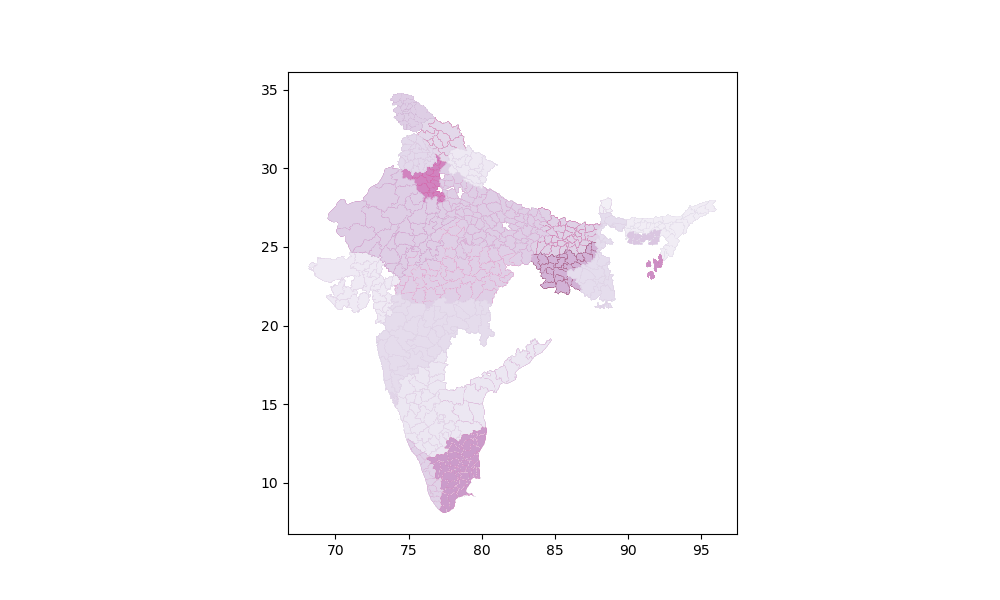

In [23]:
# set a variable that will call whatever column we want to visualise on the map
visualize_var = " Estimated Unemployment Rate (%)"

# set the range for the choropleth
vmin, vmax = 120, 220

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))

merged.plot(
    column=visualize_var, 
    cmap='PuRd', 
    linewidth=0.8, 
    ax=ax
    )

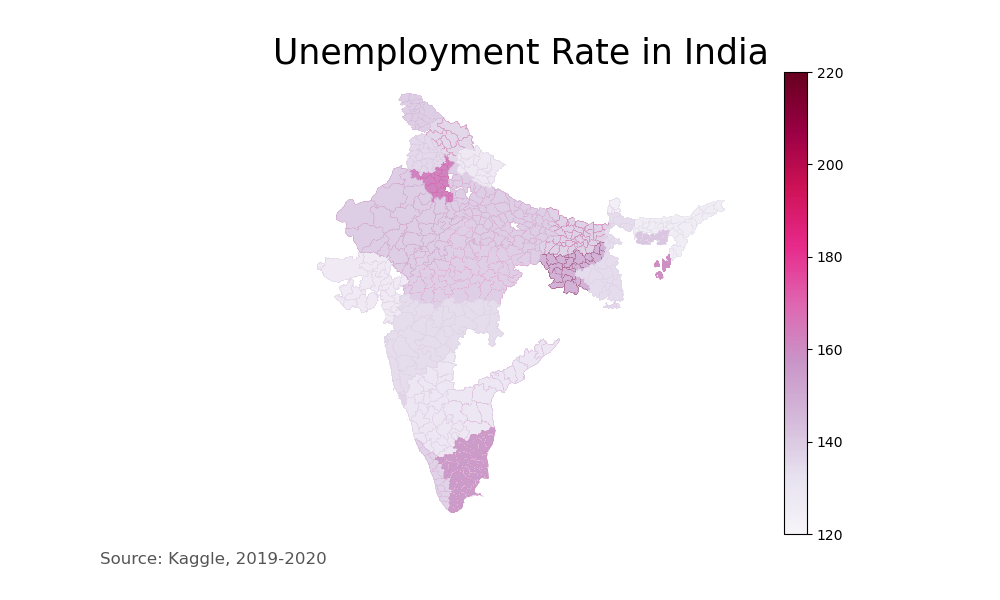

In [22]:
# remove the axis
ax.axis('off')

# add a title
ax.set_title(
    'Unemployment Rate in India', 
    fontdict={'fontsize': '25', 
    'fontweight' : '3'})

# create an annotation for the data source
ax.annotate(
    'Source: Kaggle, 2019-2020',
    xy=(0.1, .08), 
    xycoords='figure fraction', 
    horizontalalignment='left', 
    verticalalignment='top', 
    fontsize=12, 
    color='#555555'
    )

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(
    cmap='PuRd', 
    norm=plt.Normalize(vmin=vmin, vmax=vmax)
    )

# empty array for the data range
sm._A = []

# add the colorbar to the figure
cbar = fig.colorbar(sm)

#saving our map as .png file.
#fig.savefig('map_export.png', dpi=300)

fig.show()